In [149]:
import numpy as np
import pandas as pd



In [150]:
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [115]:
data.shape

(5728, 2)

In [116]:
data['text'][1]

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [117]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [118]:
import seaborn as sns

<Axes: ylabel='count'>

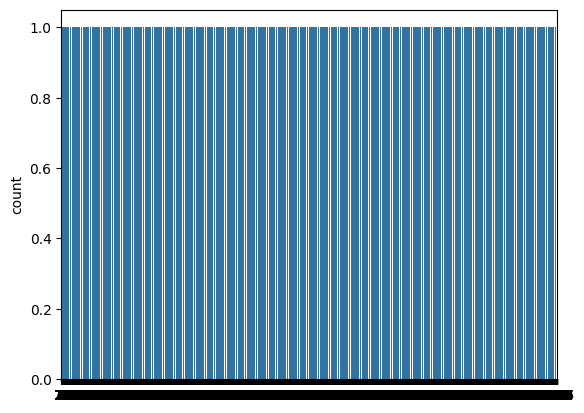

In [119]:
sns.countplot(data['spam'])

In [120]:
num_duplicates = data.duplicated().sum()
print("Number of Duplicated Rows:", num_duplicates)
if num_duplicates > 0:
    duplicated_rows = data[data.duplicated()]
    print("\nDuplicated Rows:")
    print(duplicated_rows.head(33))
else:
    print("\nNo Duplicated Rows Found.")
    
    


Number of Duplicated Rows: 33

Duplicated Rows:
                                                   text  spam
2155  Subject: research allocations to egm  hi becky...     0
2260  Subject: departure of grant masson  the resear...     0
2412  Subject: re : schedule and more . .  jinbaek ,...     0
2473  Subject: day off tuesday  stinson ,  i would l...     0
2763  Subject: re : your mail  zhendong ,  dr . kami...     0
3123  Subject: re : grades  pam ,  the students rese...     0
3152  Subject: tiger evals - attachment  tiger hosts...     0
3248  Subject: re : i am zhendong  zhendong ,  thank...     0
3249  Subject: hello from enron  dear dr . mcmullen ...     0
3387  Subject: term paper  dr . kaminski ,  attached...     0
3573  Subject: telephone interview with the enron re...     0
3660  Subject: re : summer work . .  jinbaek ,  this...     0
3690  Subject: re : weather and energy price data  m...     0
3823  Subject: research get - together at sandeep ko...     0
4203  Subject: re : wi

In [121]:
drop_duplicated=data.drop_duplicates(inplace=False)
drop_duplicated

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [122]:
data.duplicated(subset=['text'])


0       False
1       False
2       False
3       False
4       False
        ...  
5723    False
5724    False
5725    False
5726    False
5727    False
Length: 5728, dtype: bool

In [123]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [124]:
data.shape

(5728, 2)

In [125]:
5728 - 33

5695

<Axes: ylabel='count'>

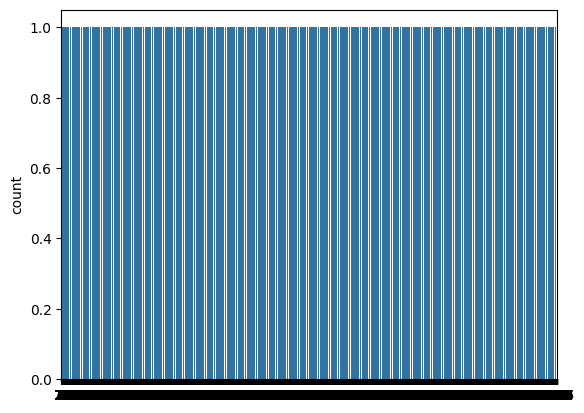

In [126]:
sns.countplot(data['spam'])

In [127]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

# Separate in X and Y

In [128]:
X = data['text'].values
y = data['spam'].values

In [129]:
X[0],y[0]

("Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  m

In [130]:
y[0]

1

# Train - Test split

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 42)

In [132]:
X_train,X_test.shape

(array(['Subject: re : request for payroll reclassification - approved  joann ,  yes , sorry . 413 was the number on the form i received .  vince  enron property & services corp .  from : joann holloway 01 / 11 / 2000 02 : 01 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : re : request for payroll reclassification - approved  vince ,  on your reclass information , the company number indicated should be 0011 not  413 .  jo ann holloway  x 35957  vince j kaminski  01 / 11 / 2000 01 : 33 pm  to : stella l ely / hou / ect @ ect  cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle  hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s  galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie  akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis  allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect  subject : request for payroll reclassification

In [133]:
X_test.shape

(1146,)

In [134]:
y_train,y_test.shape

(array([0, 0, 0, ..., 0, 0, 1], dtype=int64), (1146,))

In [135]:
y_test.shape

(1146,)

# Preprocessing 

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
cv = CountVectorizer()
cv


CountVectorizer()

# Training by ML Algorithm

In [138]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
nb = KNeighborsClassifier()
nb

KNeighborsClassifier()

In [139]:
pipe = make_pipeline(cv, nb)
pipe

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [140]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [141]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [166]:
import matplotlib.pyplot as plt

In [167]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred, y_test)



0.9092495636998255

In [168]:
classification_report(y_pred, y_test)


'              precision    recall  f1-score   support\n\n           0       0.98      0.90      0.94       934\n           1       0.69      0.94      0.79       212\n\n    accuracy                           0.91      1146\n   macro avg       0.84      0.92      0.87      1146\nweighted avg       0.93      0.91      0.91      1146\n'

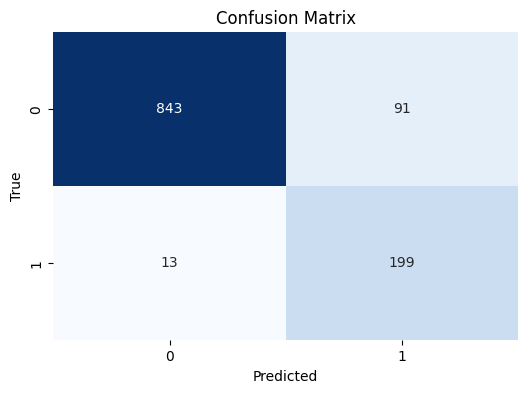

In [170]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

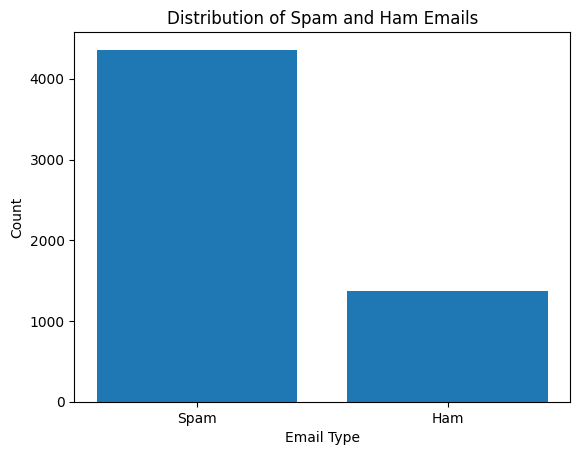

In [173]:
spam_count = data[data['spam'] == 0].shape[0]
ham_count = data[data['spam'] == 1].shape[0]

plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

In [178]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

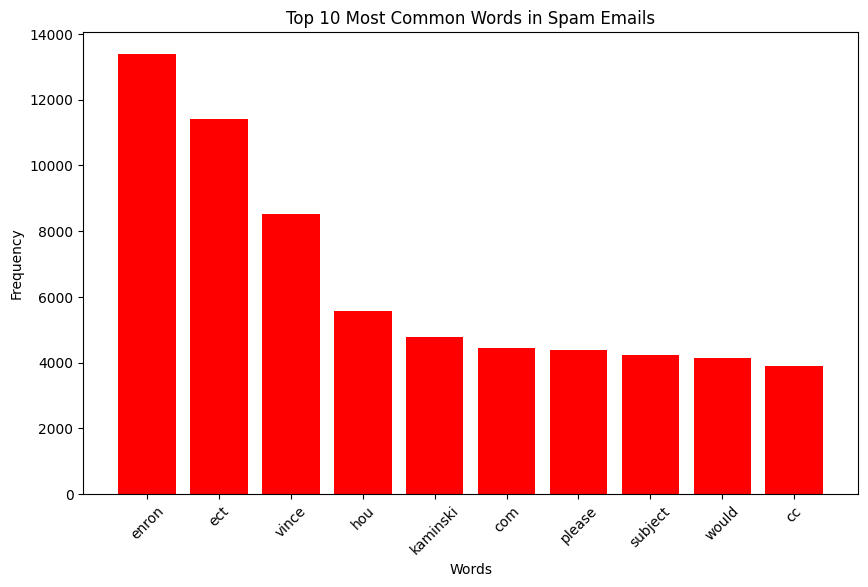

In [181]:
stop_words = set(stopwords.words('english'))
spam_words = " ".join(data[data['spam'] == 0]['text']).split()
ham_words = " ".join(data[data['spam'] == 1]['text']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='r')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

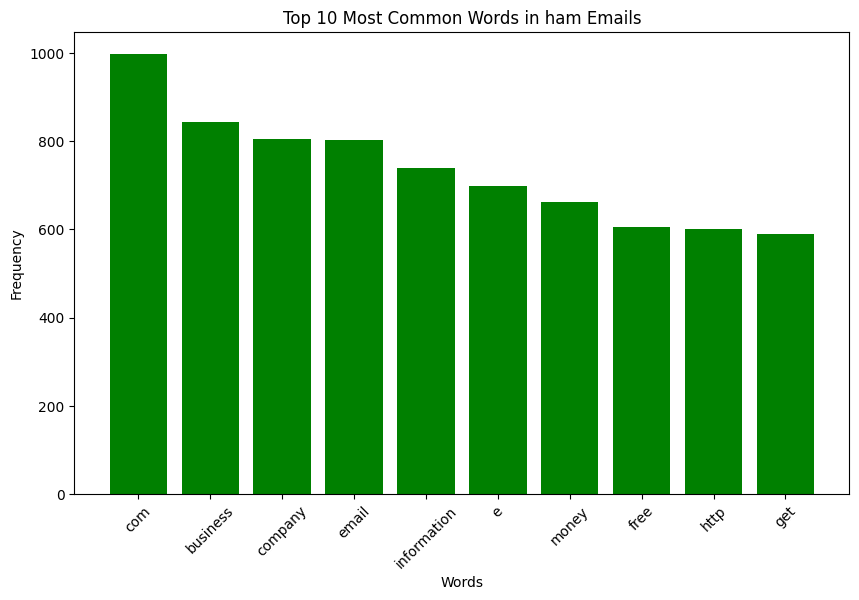

In [183]:
stop_words = set(stopwords.words('english'))
spam_words = " ".join(data[data['spam'] == 0]['text']).split()
ham_words = " ".join(data[data['spam'] == 1]['text']).split()

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in ham Emails')
plt.xticks(rotation=45)
plt.show()

In [ ]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

In [ ]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))